<a href="https://colab.research.google.com/github/Anastasya2701/telecom-project/blob/main/analisis_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
uploaded = files.upload()

Saving internet_service_churn.csv to internet_service_churn.csv


In [4]:
df = pd.read_csv('../internet_service_churn.csv')

In [5]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [7]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
missing_values = df.isnull().sum()

<ipython-input-10-b61424f51807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette = 'viridis')


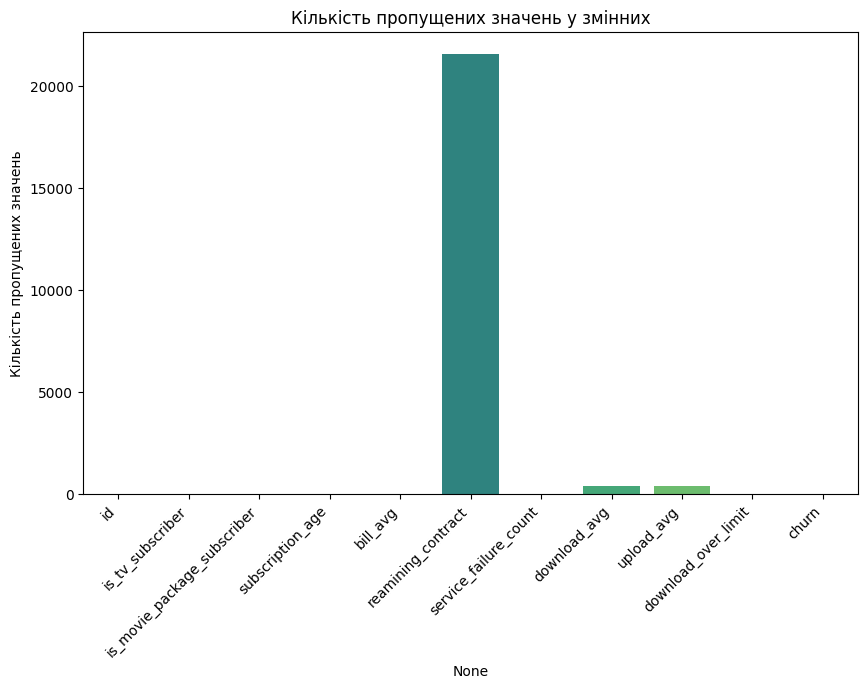

<ipython-input-10-b61424f51807>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


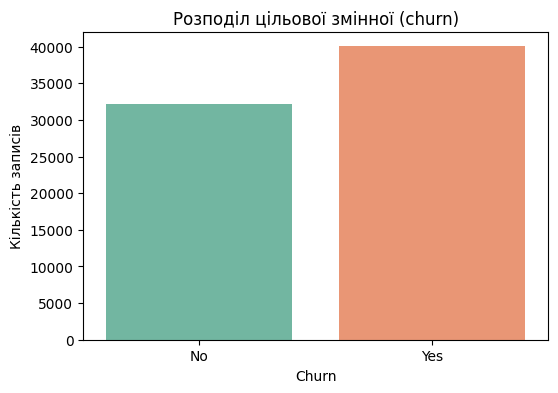

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette = 'viridis')
plt.title('Кількість пропущених значень у змінних')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Кількість пропущених значень')
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Розподіл цільової змінної (churn)')
plt.xlabel('Churn')
plt.ylabel('Кількість записів')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [11]:
correlation_matrix = df.corr()

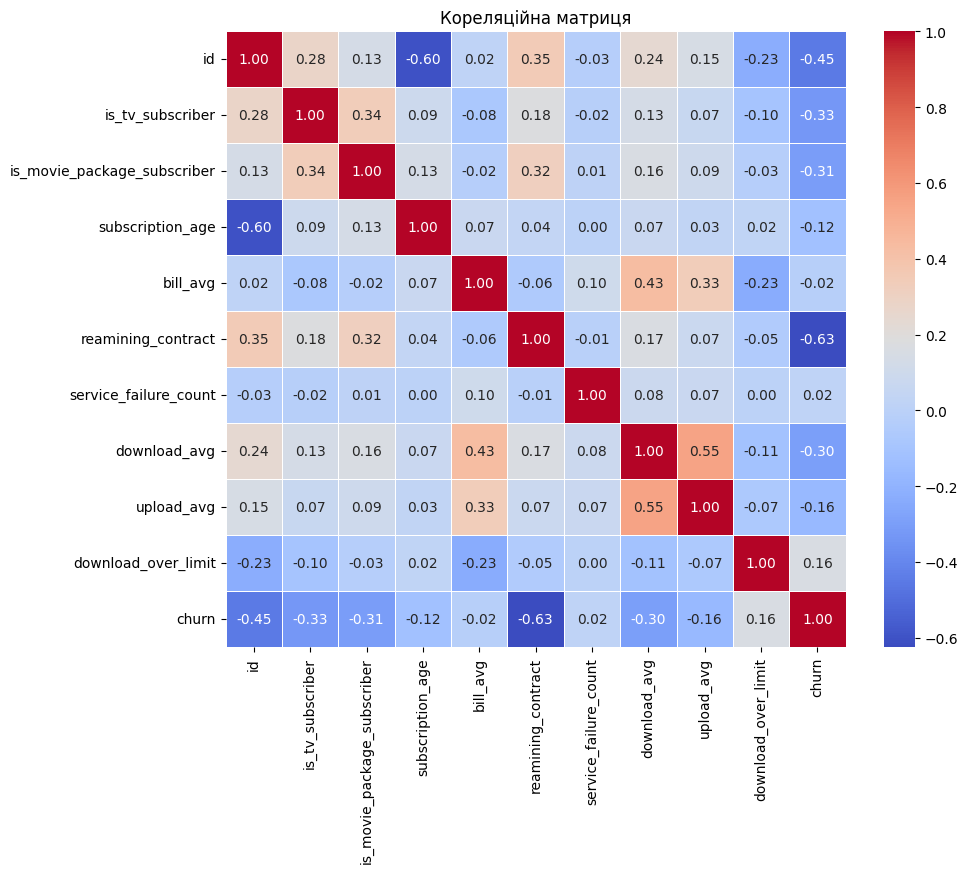

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

На основі проведеного аналізу даних можна зробити такі висновки:
 1. Пропущені значення:
 • Значна кількість пропущених значень у змінній reamining_contract (приблизно 21,572 записів) і незначна кількість у змінних download_avg та upload_avg. Це може свідчити про недоліки у зборі даних або різні типи контрактів клієнтів.
 2. Цільова змінна churn:
 • Розподіл відтоку клієнтів досить збалансований (55% клієнтів з відтоком, 45% залишились). Це дозволить уникнути серйозних проблем із дисбалансом класів під час навчання моделі.
 3. Кореляції між змінними:
 • Сильна кореляція між download_avg і upload_avg може вказувати на надмірність, тому можна залишити лише одну змінну для моделі.
 • Змінні reamining_contract та service_failure_count мають певну залежність від churn, що робить їх перспективними для моделі.


 Based on the conducted data analysis, the following conclusions can be drawn:
 1. Missing Values:
 • A significant number of missing values were found in the variable reamining_contract (approximately 21,572 records) and a minor number in the variables download_avg and upload_avg. This may indicate deficiencies in data collection or differences in customer contract types.
 2. Target Variable (churn):
 • The distribution of customer churn is fairly balanced (55% churned, 45% stayed). This helps to avoid serious class imbalance issues during model training.
 3. Correlations Between Variables:
 • A strong correlation between download_avg and upload_avg may indicate redundancy, so only one of these variables could be retained for the model.
 • The variables reamining_contract and service_failure_count show some dependence on churn, making them promising features for the model.